In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [2]:
df=pd.read_html("https://www.espncricinfo.com/series/wpl-2024-25-1463356/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Mumbai Indians Women,4,3,1,0,0,6,0.780,LWWW,"vs DC-W, UPW-W, GG-W",599/73.0,594/80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP...","WFebruary 26, 2025, 11th Match, MI Women vs UP..."
2,2Delhi Capitals Women,5,3,2,0,0,6,-0.223,WLWLW,"vs MI-W, RCB-W, GG-W",748/95.0,780/96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG...","WFebruary 25, 2025, 10th Match, DC Women vs GG..."
4,3Royal Challengers Bengaluru Women,4,2,2,0,0,4,0.619,WWLT,"vs DC-W, UPW-W, MI-W",695/74.5,692/79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP...","TFebruary 24, 2025, 9th Match, RCB Women vs UP..."
6,4UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,"vs GG-W, MI-W, RCB-W",808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 202

In [3]:
df=df.drop([1,3,5,7,9],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Mumbai Indians Women,4,3,1,0,0,6,0.780,LWWW,"vs DC-W, UPW-W, GG-W",599/73.0,594/80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Delhi Capitals Women,5,3,2,0,0,6,-0.223,WLWLW,"vs MI-W, RCB-W, GG-W",748/95.0,780/96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Royal Challengers Bengaluru Women,4,2,2,0,0,4,0.619,WWLT,"vs DC-W, UPW-W, MI-W",695/74.5,692/79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,"vs GG-W, MI-W, RCB-W",808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5Gujarat Giants Women,4,1,3,0,0,2,-0.974,LWLL,"vs UPW-W, DC-W, MI-W",592/78.0,598/69.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.reset_index(inplace=True)

In [5]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [6]:
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Mumbai Indians Women,4,3,1,0,0,6,0.780,LWWW,...,599/73.0,594/80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Delhi Capitals Women,5,3,2,0,0,6,-0.223,WLWLW,...,748/95.0,780/96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Royal Challengers Bengaluru Women,4,2,2,0,0,4,0.619,WWLT,...,695/74.5,692/79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,...,808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Gujarat Giants Women,4,1,3,0,0,2,-0.974,LWLL,...,592/78.0,598/69.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Teams'].unique()

array(['Mumbai Indians Women', 'Delhi Capitals Women',
       'Royal Challengers Bengaluru Women', 'UP Warriorz Women',
       'Gujarat Giants Women'], dtype=object)

In [8]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Mumbai Indians Women,4,3,1,0,0,6,0.780,LWWW,...,599/73.0,594/80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Delhi Capitals Women,5,3,2,0,0,6,-0.223,WLWLW,...,748/95.0,780/96.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Royal Challengers Bengaluru Women,4,2,2,0,0,4,0.619,WWLT,...,695/74.5,692/79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,...,808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Gujarat Giants Women,4,1,3,0,0,2,-0.974,LWLL,...,592/78.0,598/69.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Rk']=np.arange(1,6)

In [10]:
df['Teams']=[x.split(' Women')[0] for x in df['Teams']]

In [11]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [12]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [13]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,4,3,1,0,0,6,0.780
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,5,3,2,0,0,6,-0.223
2,3,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,4,2,2,0,0,4,0.619
3,4,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,5,2,3,0,0,4,-0.124
4,5,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,4,1,3,0,0,2,-0.974


In [14]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [15]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

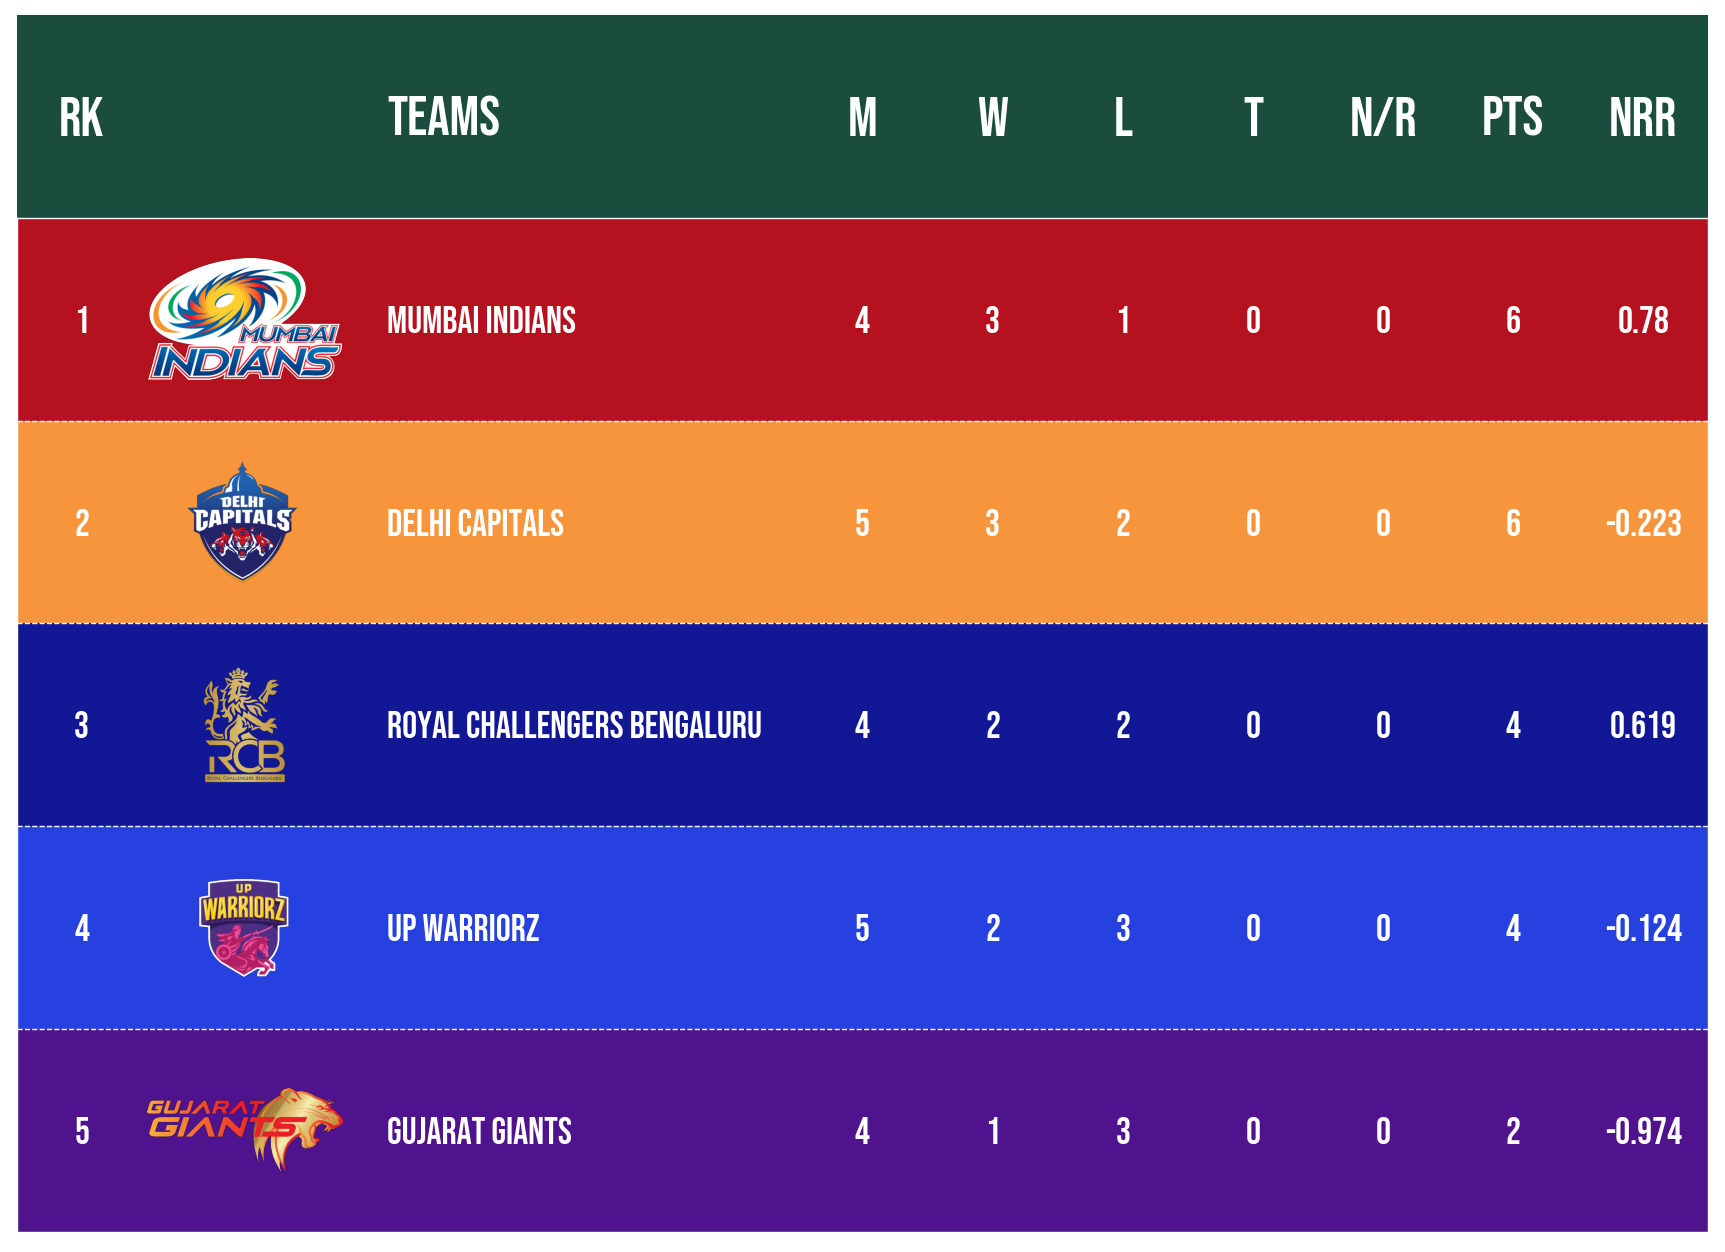

In [16]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#1B4D3E')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#B5111F")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#F7953C")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#121795")
table.rows[2].set_fontcolor("#ffffff")
#rcb
table.rows[3].set_facecolor("#2641E0")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#50138E")
table.rows[4].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [17]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)